<a href="https://colab.research.google.com/github/albertos-2002/SF3/blob/main/elettronica/esperienza_10__circuito_diodi/Esperienza_10_mk2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 🟢 Calcolo delle componenti del circuito

Per le misure di capacità, abbiamo riscontrato un fondo (misura nulla) di $20  \ pF$

In [ ]:
c = 500 - 0.020 #nF scala 1000nF
err_c = math.sqrt(1/3)* math.sqrt( (c*1/100)**2 + (10)**2 )   #ipotesi uniforme

r1 = 4.630 #kohm scala 10kohm
err_r1 = math.sqrt(1/3)* math.sqrt( (r1* 0.07/100)**2 + (0.8)**2 )

r2 = 4.626 #kohm scala 10kohm
err_r2 = math.sqrt(1/3)* math.sqrt( (r2* 0.07/100)**2 + (0.8)**2 )

r3 = 4.653 #kohm scala 10kohm
err_r3 = math.sqrt(1/3)* math.sqrt( (r3* 0.07/100)**2 + (0.8)**2 )

r5 = 3.233 #kohm scala 10kohm
err_r5 = math.sqrt(1/3)* math.sqrt( (r5* 0.07/100)**2 + (0.8)**2 )

r6 = 3.228 #kohm scala 10kohm
err_r6 = math.sqrt(1/3)* math.sqrt( (r6* 0.07/100)**2 + (0.8)**2 )

print( "c\n", c, " \pm ", err_c, "  nF")
print(100* err_c/c)
print( "\n r1 \n", r1, " \pm ",  err_r1, "  kohm")
print(100* err_r1/r1)
print( "\n r2 \n", r2, " \pm ",  err_r2, "  kohm")
print(100* err_r2/r2)
print( "\n r3 \n", r3, " \pm ",  err_r3, "  kohm")
print(100* err_r3/r3)
print( "\n r5 \n", r5, " \pm ",  err_r5, "  kohm")
print(100* err_r5/r5)
print( "\n r6 \n", r6, " \pm ",  err_r6, "  kohm")
print(100* err_r6/r6)

c
 499.98  \pm  6.454920604727322   nF
1.2910357623759594

 r1 
 4.63  \pm  0.461884005669894   kohm
9.97589645075365

 r2 
 4.626  \pm  0.4618839991236039   kohm
9.984522246511109

 r3 
 4.653  \pm  0.4618840434208605   kohm
9.926585932105318

 r5 
 3.233  \pm  0.4618820634540128   kohm
14.2864851052896

 r6 
 3.228  \pm  0.4618820577420748   kohm
14.308613932530198


# ⏳ Simulazione

## **Download file from github**

In [2]:
%%shell
curl https://raw.githubusercontent.com/albertos-2002/SF3/main/elettronica/esperienza_10__circuito_diodi/simulazione/circuito_diodo > "dati_simulazione"
curl https://raw.githubusercontent.com/albertos-2002/SF3/main/elettronica/esperienza_10__circuito_diodi/oscilloscopio/10%20Vin%20A/voutA > "vouta"
curl https://raw.githubusercontent.com/albertos-2002/SF3/main/elettronica/esperienza_10__circuito_diodi/oscilloscopio/10%20Vin%20B/voutB > "voutb"
curl https://raw.githubusercontent.com/albertos-2002/SF3/main/elettronica/esperienza_10__circuito_diodi/oscilloscopio/10%20Vin%20Vout/vout > "vout"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 19397  100 19397    0     0   113k      0 --:--:-- --:--:-- --:--:--  113k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 65779  100 65779    0     0   336k      0 --:--:-- --:--:-- --:--:--  336k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 65791  100 65791    0     0   318k      0 --:--:-- --:--:-- --:--:--  318k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 65791  100 65791    0     0   334k      0 --:--:-- --:--:-- --:--:--  334k


In [67]:
time_spice, vout_spice, vin_spice, va_spice, vb_spice = np.loadtxt( "dati_simulazione", skiprows=1, unpack=True)
timea_data, vouta_data = np.loadtxt( "vouta", skiprows=1, unpack=True)
timeb_data, voutb_data = np.loadtxt( "voutb", skiprows=1, unpack=True)
time_data, vout_data = np.loadtxt( "vout", skiprows=1, unpack=True)

## **$V_A$**

In [41]:
time_spice_mod = []
for i in time_spice:
  dummy = 0
  dummy = i - 0.000285
  time_spice_mod.append(dummy)

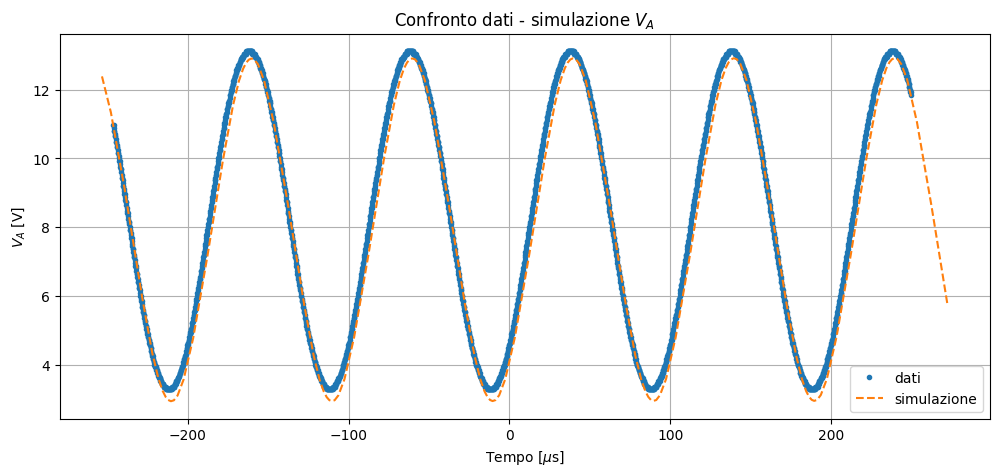

In [52]:
plt.figure(figsize=(12,5))
plt.plot( np.multiply(timea_data, 1000000) , vouta_data , marker=".", linestyle="", label="dati")
plt.plot( np.multiply(time_spice_mod[21:145], 1000000)  , va_spice[21:145] , marker="", linestyle="--", label="simulazione")

plt.title("Confronto dati - simulazione $V_A$")
plt.ylabel("$V_A$ [V]")
plt.xlabel("Tempo [$\mu$s]")

plt.grid()
plt.legend()

## **$V_B$**

In [68]:
time_spice_mod = []
for i in time_spice:
  dummy = 0
  dummy = i - 0.0003
  time_spice_mod.append(dummy)

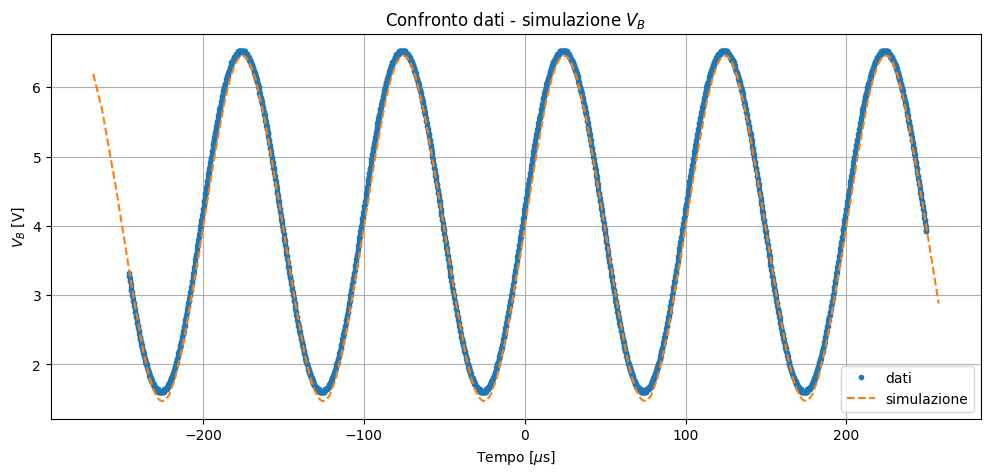

In [70]:
plt.figure(figsize=(12,5))
plt.plot( np.multiply(timeb_data, 1000000) , voutb_data , marker=".", linestyle="", label="dati")
plt.plot( np.multiply(time_spice_mod[21:145], 1000000) , vb_spice[21:145] , marker="", linestyle="--", label="simulazione")

plt.title("Confronto dati - simulazione $V_B$")
plt.ylabel("$V_B$ [V]")
plt.xlabel("Tempo [$\mu$s]")

plt.grid()
plt.legend()

## **$V_{OUT}$**

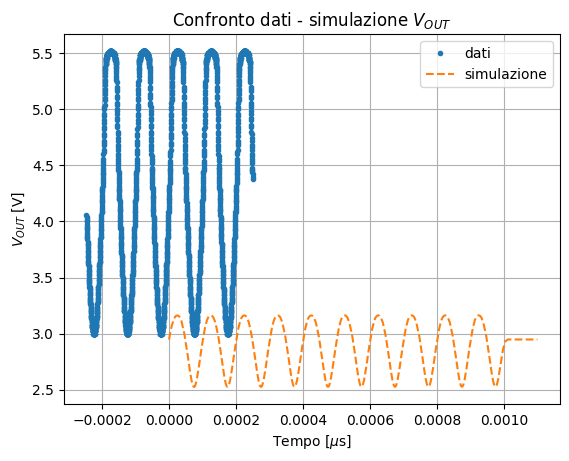

In [60]:
plt.plot( time_data , vout_data , marker=".", linestyle="", label="dati")
plt.plot( time_spice , vout_spice , marker="", linestyle="--", label="simulazione")

plt.title("Confronto dati - simulazione $V_{OUT}$")
plt.ylabel("$V_{OUT}$ [V]")
plt.xlabel("Tempo [$\mu$s]")

plt.grid()
plt.legend()